In [2]:
import os
from pathlib import Path
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr

In [3]:
# csv file containing air temperature and ground temperatures at varying depths for different sites (measured in july - september 2011)
df = pd.read_csv("raw_datasets/erikson/Groundtemperatu/BTI_2011TimeSeriesData_GroundTemperature.csv")

# csv file containing mean sediment diameters and descriptions of sediment samples at different sites (measured in july 2011)
df_sediment = pd.read_csv("raw_datasets/erikson/Meangrainsizeof/BTI_2011GrainSize_Data.csv")

# Read the Shapefile into a GeoDataFrame
gdf_sl = gpd.read_file('raw_datasets/gibbs/BarterIsland_Shoreline_1947to2020.zip').to_crs(crs="4326")

In [4]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude.values, df.Latitude.values), crs=4326)

gdf_sediment = gpd.GeoDataFrame(df_sediment, geometry=gpd.points_from_xy(df_sediment.Longitude.values, df_sediment.Latitude.values), crs=4326)

gdf.head()

,SiteID,Instrument,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm,geometry
0,BL01,HOBO,-143.77901,70.08405,2011,7,8,7,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,POINT (-143.77901 70.08405)
1,BL01,HOBO,-143.77901,70.08405,2011,7,8,8,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,POINT (-143.77901 70.08405)
2,BL01,HOBO,-143.77901,70.08405,2011,7,8,9,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,POINT (-143.77901 70.08405)
3,BL01,HOBO,-143.77901,70.08405,2011,7,8,10,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,POINT (-143.77901 70.08405)
4,BL01,HOBO,-143.77901,70.08405,2011,7,8,11,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,POINT (-143.77901 70.08405)


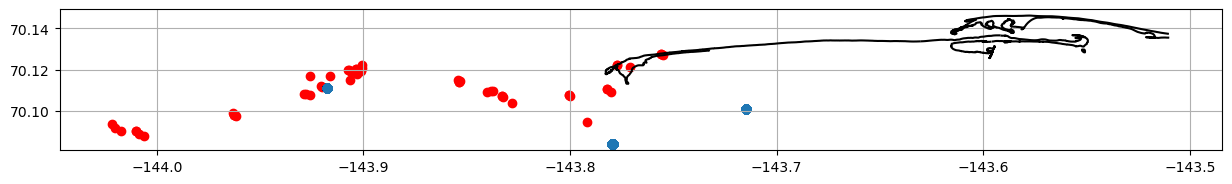

In [5]:
fig, ax = plt.subplots(figsize=(15,5))

gdf_sl[(gdf_sl.Year_ == 2010) + (gdf_sl.Year_ == 2011)].plot(ax=ax, color='k')
gdf_sediment.plot(ax=ax, color='red')
gdf.plot(ax=ax)

ax.grid()

ax.set_aspect('equal')

In [5]:
coords = []

for point in gdf.geometry.values:
    if (point.x, point.y) not in coords:
        coords.append((point.x, point.y))
        
print(coords)

p1 = (-143.77901, 70.08405)  # main land
p2 = (-143.71484, 70.10072)  # main land, but a bit north-eastward
p3 = (-143.91774, 70.11128)  # Arey Island

[(-143.77901, 70.08405), (-143.77921, 70.084111), (-143.77926, 70.08415), (-143.77947, 70.084211), (-143.71484, 70.10072), (-143.91774, 70.11128)]


Assume I only siteID BL01

In [7]:
# px, py = p3

# mask = (gdf.geometry.x == px) * (gdf.geometry.y == py)

mask = (gdf.SiteID == 'BL01')

gdf_masked = gdf[mask]

gdf_masked.describe()

,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm
count,1.940000e+03,1.940000e+03,1940.0,1940.000000,1940.000000,1940.000000,1940.0,0.0,0.0,0.0,0.0,1940.000000,0.0,0.0,1940.000000,1940.000000,1940.000000
mean,-1.437790e+02,7.008405e+01,2011.0,8.029897,16.280928,11.514433,0.0,NaN,NaN,NaN,NaN,-0.059897,NaN,NaN,-1.415258,-3.330103,-4.848918
std,1.506739e-12,2.117963e-12,0.0,0.784805,8.280098,6.923609,0.0,NaN,NaN,NaN,NaN,0.559691,NaN,NaN,0.559907,0.683785,0.700051
min,-1.437790e+02,7.008405e+01,2011.0,7.000000,1.000000,0.000000,0.0,NaN,NaN,NaN,NaN,-1.500000,NaN,NaN,-2.700000,-4.700000,-6.200000
25%,-1.437790e+02,7.008405e+01,2011.0,7.000000,10.000000,6.000000,0.0,NaN,NaN,NaN,NaN,-0.125000,NaN,NaN,-1.700000,-3.900000,-5.400000
50%,-1.437790e+02,7.008405e+01,2011.0,8.000000,16.000000,12.000000,0.0,NaN,NaN,NaN,NaN,0.200000,NaN,NaN,-1.200000,-3.200000,-4.700000
75%,-1.437790e+02,7.008405e+01,2011.0,9.000000,23.000000,18.000000,0.0,NaN,NaN,NaN,NaN,0.300000,NaN,NaN,-1.000000,-2.800000,-4.300000
max,-1.437790e+02,7.008405e+01,2011.0,9.000000,31.000000,23.000000,0.0,NaN,NaN,NaN,NaN,0.400000,NaN,NaN,-0.100000,-0.100000,-0.200000


In [8]:
display(gdf_masked.head())
display(gdf_masked.tail())

,SiteID,Instrument,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm,geometry
0,BL01,HOBO,-143.77901,70.08405,2011,7,8,7,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,POINT (-143.77901 70.08405)
1,BL01,HOBO,-143.77901,70.08405,2011,7,8,8,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,POINT (-143.77901 70.08405)
2,BL01,HOBO,-143.77901,70.08405,2011,7,8,9,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,POINT (-143.77901 70.08405)
3,BL01,HOBO,-143.77901,70.08405,2011,7,8,10,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,POINT (-143.77901 70.08405)
4,BL01,HOBO,-143.77901,70.08405,2011,7,8,11,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,POINT (-143.77901 70.08405)


,SiteID,Instrument,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm,geometry
1935,BL01,HOBO,-143.77901,70.08405,2011,9,26,22,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,-0.9,-2.5,-4.0,POINT (-143.77901 70.08405)
1936,BL01,HOBO,-143.77901,70.08405,2011,9,26,23,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,-0.9,-2.5,-4.0,POINT (-143.77901 70.08405)
1937,BL01,HOBO,-143.77901,70.08405,2011,9,27,0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,-0.9,-2.5,-4.0,POINT (-143.77901 70.08405)
1938,BL01,HOBO,-143.77901,70.08405,2011,9,27,1,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,-0.9,-2.5,-4.0,POINT (-143.77901 70.08405)
1939,BL01,HOBO,-143.77901,70.08405,2011,9,27,2,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,-0.9,-2.5,-4.0,POINT (-143.77901 70.08405)


* p1 only has values for T50, T100, T200, T295
* p2 only has values for Tair and T15.
* p3 only has values for Tair, T10, T30, T50

Regarding completeness of the data, this might make p1 the most suitable, even though it's on Arey Island, which is a bit out of the way. All data was collected between 8-7-2011 and 26-9-2011.

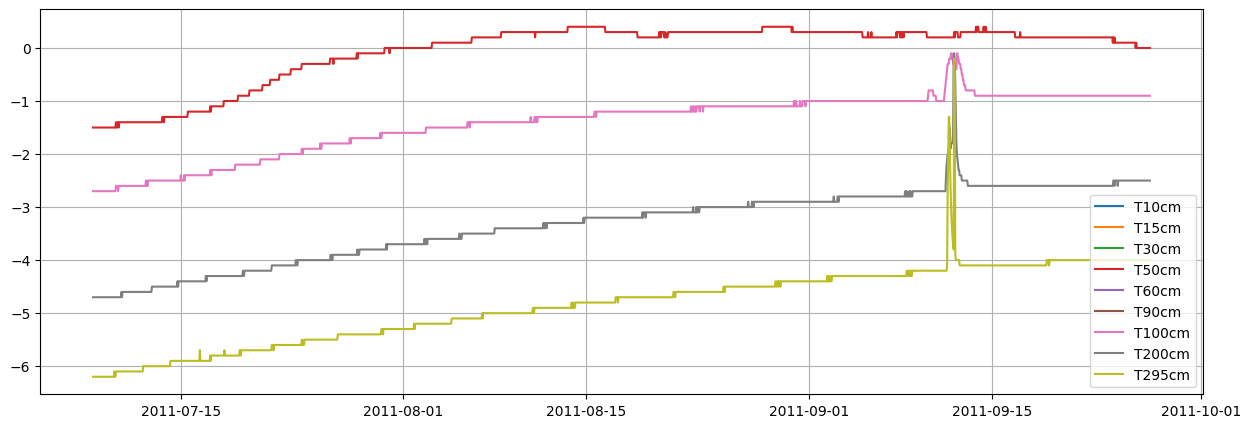

In [9]:
timestamps = pd.to_datetime(gdf_masked[["year", "month", "day", "hour", "minute"]])
T10 = gdf_masked.T10cm.values
T15 = gdf_masked.T15cm.values
T30 = gdf_masked.T30cm.values
T50 = gdf_masked.T50cm.values
T60 = gdf_masked.T60cm.values
T90 = gdf_masked.T90cm.values
T100 = gdf_masked.T100cm.values
T200 = gdf_masked.T200cm.values
T295 = gdf_masked.T295cm.values

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(timestamps, T10, label='T10cm')
ax.plot(timestamps, T15, label='T15cm')
ax.plot(timestamps, T30, label='T30cm')
ax.plot(timestamps, T50, label='T50cm')
ax.plot(timestamps, T60, label='T60cm')
ax.plot(timestamps, T90, label='T90cm')
ax.plot(timestamps, T100, label='T100cm')
ax.plot(timestamps, T200, label='T200cm')
ax.plot(timestamps, T295, label='T295cm')

ax.legend()
ax.grid()


This data should be compared with the Era5 data (which I don't have yet for the correct year).

In [16]:
# load in era5 data
era5 = pd.read_csv(os.path.join(os.getcwd(), Path("ts_datasets/era5.csv")), parse_dates=['time'])

YEAR = 2011
MIN_MONTH = 1
MAX_MONTH = 12

# mask out correct values
timestamps_era5 = pd.to_datetime(era5.time.values)
mask = (timestamps_era5.month >= MIN_MONTH) * (timestamps_era5.month <= MAX_MONTH) * (timestamps_era5.year == YEAR)
era5_masked = era5[mask]

# # timestamps used for plotting
# t_start = pd.to_datetime("07-01-2011")
# t_end = pd.to_datetime("10-01-2011")

# timestamps_era5_plot = pd.date_range(start=t_start, end=t_end, freq='1h', inclusive='left')

timestamps_era5_plot = era5_masked.time.values

# get arrays of values
T035_era5 = era5_masked.soil_temperature_level_1.values - 273.15
T18_era5 = era5_masked.soil_temperature_level_2.values - 273.15
T64_era5 = era5_masked.soil_temperature_level_3.values - 273.15
T195_era5 = era5_masked.soil_temperature_level_4.values - 273.15

print(len(era5_masked.soil_temperature_level_1.values))
print(len(timestamps_era5_plot))

8760
8760


Text(0.5, 0.98, 'ground temperature (era5 & Erikson)')

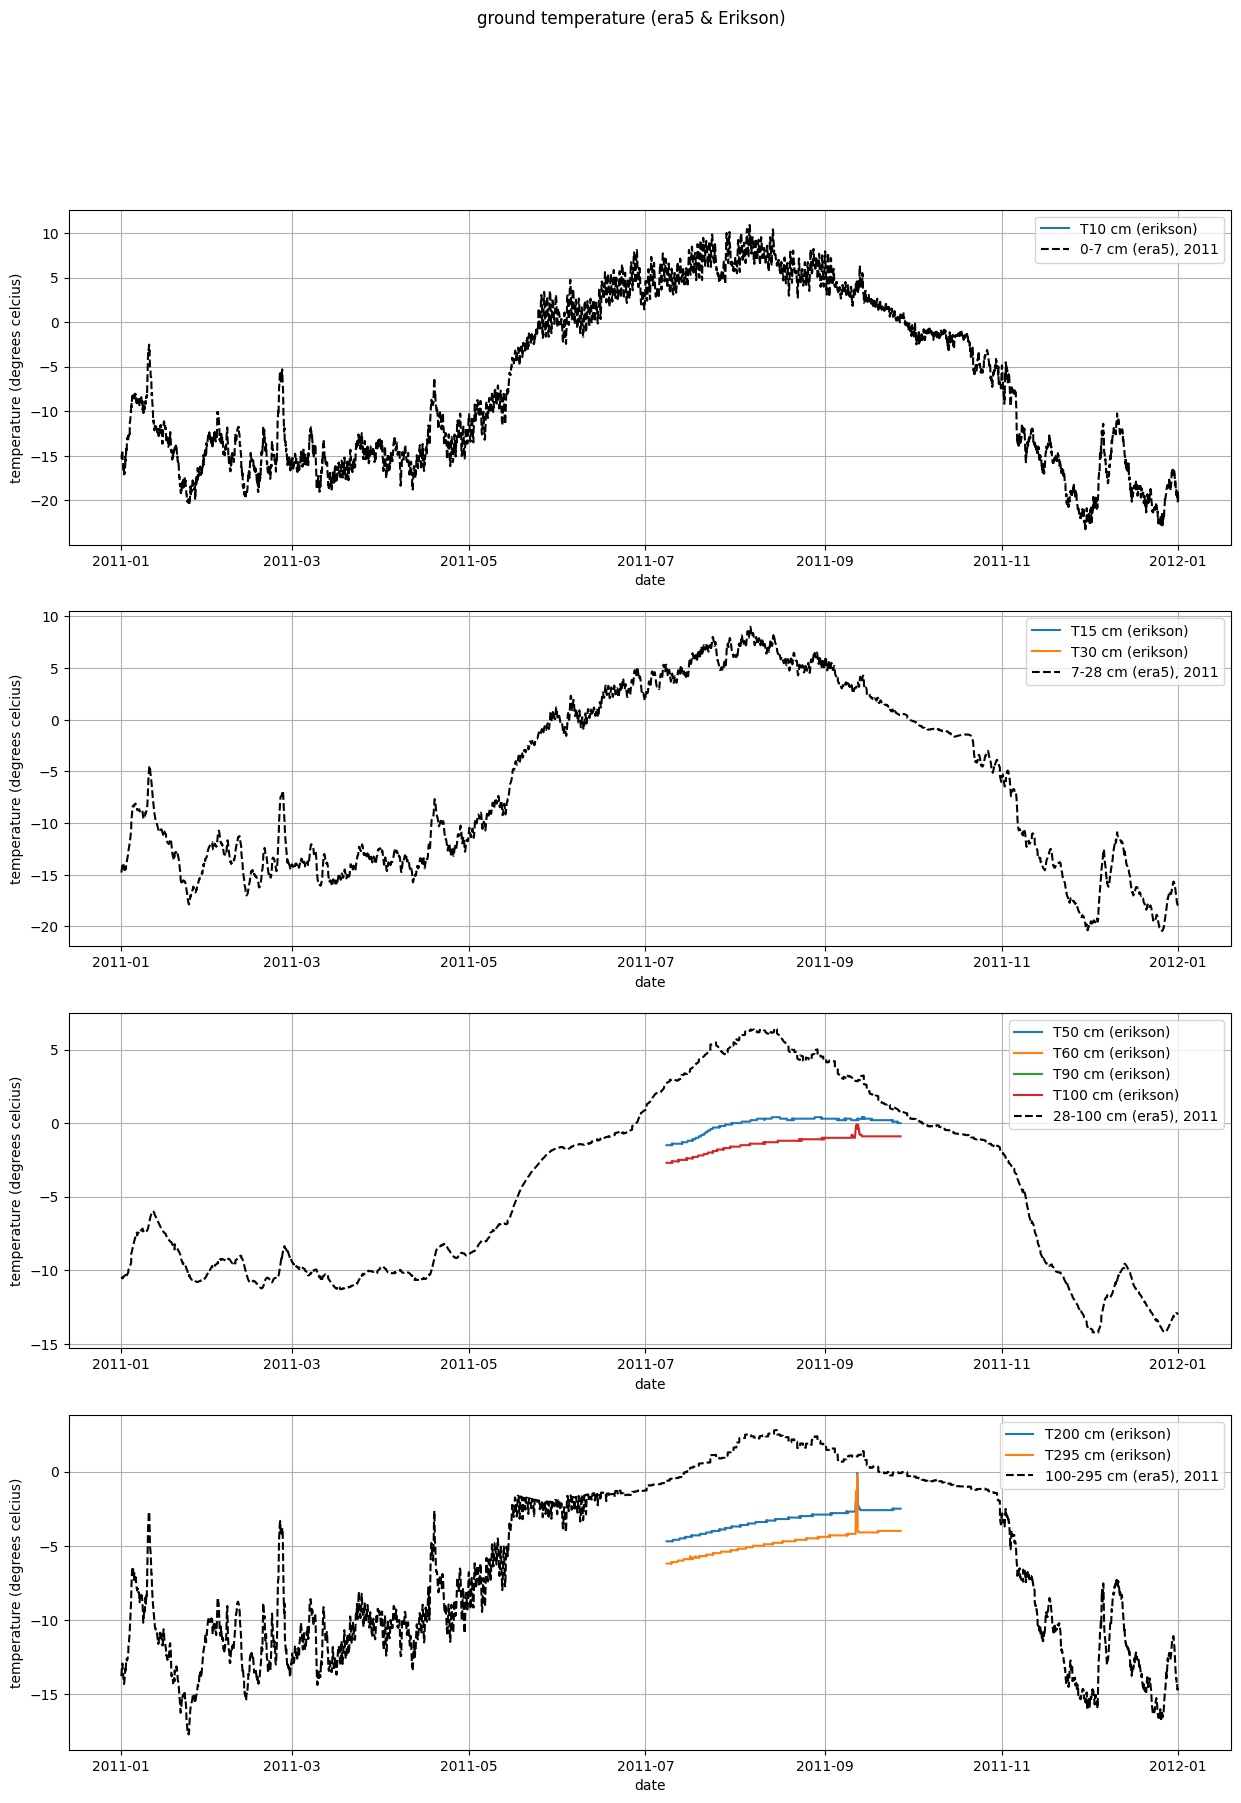

In [17]:
fig, axs = plt.subplots(4, 1, figsize=(15,20))

axs[0].plot(timestamps, T10, label='T10 cm (erikson)')
axs[1].plot(timestamps, T15, label='T15 cm (erikson)')
axs[1].plot(timestamps, T30, label='T30 cm (erikson)')
axs[2].plot(timestamps, T50, label='T50 cm (erikson)')
axs[2].plot(timestamps, T60, label='T60 cm (erikson)')
axs[2].plot(timestamps, T90, label='T90 cm (erikson)')
axs[2].plot(timestamps, T100, label='T100 cm (erikson)')
axs[3].plot(timestamps, T200, label='T200 cm (erikson)')
axs[3].plot(timestamps, T295, label='T295 cm (erikson)')

axs[0].plot(timestamps_era5_plot, T035_era5, label='0-7 cm (era5), 2011', ls='--', color='k')
axs[1].plot(timestamps_era5_plot, T18_era5, label='7-28 cm (era5), 2011', ls='--', color='k')
axs[2].plot(timestamps_era5_plot, T64_era5, label='28-100 cm (era5), 2011', ls='--', color='k')
axs[3].plot(timestamps_era5_plot, T195_era5, label='100-295 cm (era5), 2011', ls='--', color='k')

for ax in axs:
    ax.set_xlabel("date")
    ax.set_ylabel("temperature (degrees celcius)")
    ax.legend()

    ax.grid()
    
fig.suptitle("ground temperature (era5 & Erikson)")

Results for different points:
- p1 is about 6 degrees too low and has not that good data availability
- p2 is about 2.5 degrees to high and has bad data availability
- p3 shows reasonable resemblance and has good data availability.

In general, Erikson's ground temperature data is much peakier.